# 00. Load Packages

In [2]:
import os, glob
import pcraster as pcr
import pandas as pd
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt
import cartopy.crs
import cartopy.io.img_tiles

import pcr_tool 

# 01. Basic Inputs for Example Run

In [18]:
epsg = 32645 # EPSG for clone.map
epsg_check = 4326 # EPSG for checking projections
missing_value = -9999 # missing_value

path_clone = os.path.join('..', 'examples', 'Trisuli', 'input', 'clone.map') # path to clone.map (example map 1)
path_dem = os.path.join('..', 'examples', 'Trisuli', 'input', 'dem.map') # path to dem.map (example map 2)
path_tavg = glob.glob(os.path.join('..', 'examples', 'Trisuli', 'input', 'forcing', 'tavg0000.00*')); path_tavg.sort() # a list of paths to tavg000.00*.map (example map 3)
tcoord = pd.date_range(start = pd.Timestamp('01/01/2006'), periods = len(path_tavg), freq = 'D') # set timestamps for tavg000.00*.map

path_out = 'output' # path for output
os.makedirs(path_out, exist_ok = True)

# 02. Clonemap

First, we need to set an EPSG to define a clonemap.

In [19]:
map_clone = pcr_tool.clonemap(epsg = epsg)

Let's load a clonemap from a specified path.

In [20]:
map_clone.load_clonemap(path = path_clone)
pcr.aguila(map_clone.clonemap)

Also, we can create a clonemap based on the clonemap properties.

In [21]:
map_clone.create_clonemap(nrow = 749, ncol = 485, cellsize = 200, west = 290289, north = 3214899)
pcr.aguila(map_clone.clonemap)

# 03. Conversion between pcraster.Field and numpy.ndarray

Now, we're going to show conversion examples between pcraster.Field and numpy.ndarray.

In [22]:
ndarr_clone = map_clone.to_numpy() # 'field' is not required for clonemap as it is already defined when creating the class variable, 'map_clone'
ndarr_clone

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [23]:
ndarr_dem = map_clone.to_numpy(field = path_dem)
ndarr_dem

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [24]:
ndarr_tavg = map_clone.to_numpy(field = path_tavg) # 'path_tavg' is a list of paths to represent a time dimension
ndarr_tavg

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

Let's check if the conversions back to pcraster.Field are identical to the orignals.

In [25]:
map_clone_npconvs = map_clone.from_numpy(array = ndarr_clone, datatype = pcr.Boolean, missing_value = missing_value)
pcr.aguila(map_clone_npconvs)
pcr.aguila(path_clone)

In [26]:
map_dem_npconvs = map_clone.from_numpy(array = ndarr_dem, datatype = pcr.Scalar, missing_value = missing_value)
pcr.aguila(map_dem_npconvs)
pcr.aguila(path_dem)

In [27]:
idx_plot = 3
map_tavg_npconvs = map_clone.from_numpy(array = ndarr_tavg[idx_plot], datatype = pcr.Scalar, missing_value = missing_value)
pcr.aguila(map_tavg_npconvs)
pcr.aguila(path_tavg[idx_plot])

# 04. Conversion between pcraster.Field and xarray.DataArray

We're going to repeat the conversions, but now to/from xarray.DataArray.

In [28]:
da_clone = map_clone.to_xarray(varname = 'clone') # 'field' is not required for clonemap as it is already defined when creating the class variable, 'map_clone'
da_clone

<xarray.DataArray 'clone' (y: 749, x: 485)> Size: 363kB
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
Coordinates:
  * y        (y) float64 6kB 3.065e+06 3.065e+06 ... 3.215e+06 3.215e+06
  * x        (x) float64 4kB 2.904e+05 2.906e+05 ... 3.87e+05 3.872e+05

In [29]:
da_dem = map_clone.to_xarray(field = path_dem, varname = 'dem')
da_dem

<xarray.DataArray 'dem' (y: 749, x: 485)> Size: 1MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * y        (y) float64 6kB 3.065e+06 3.065e+06 ... 3.215e+06 3.215e+06
  * x        (x) float64 4kB 2.904e+05 2.906e+05 ... 3.87e+05 3.872e+05

In [30]:
da_tavg = map_clone.to_xarray(field = path_tavg, tcoord = tcoord, varname = 'tavg') # As 'path_tavg' is a list of paths to represent a time dimension, 'tcoord' is set to assign for the time dimension
da_tavg

<xarray.DataArray 'tavg' (time: 9, y: 749, x: 485)> Size: 13MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * y        (y) float64 6kB 3.065e+06 3.065e+06 ... 3.215e+06 3.215e+06
  * x        (x) float64 4kB 2.904e+05 2.906e+05 ... 3.87e+05 3.872e+05
  * time     (time) datetime64[ns] 72B 2006-01-01 2006-01-02 ... 2006-01-09

Let's check if the conversions back to pcraster.Field are identical to the orignals.

In [31]:
map_clone_xrconvs = map_clone.from_xarray(dataarray = da_clone, datatype = pcr.Boolean, missing_value = missing_value)
pcr.aguila(map_clone_xrconvs)
pcr.aguila(path_clone)

In [32]:
map_dem_xrconvs = map_clone.from_xarray(dataarray = da_dem, datatype = pcr.Scalar, missing_value = missing_value)
pcr.aguila(map_dem_xrconvs)
pcr.aguila(path_dem)

In [33]:
idx_plot = 3
map_tavg_xrconvs = map_clone.from_xarray(dataarray = da_tavg, datatype = pcr.Scalar, missing_value = missing_value)
pcr.aguila(map_tavg_xrconvs[idx_plot])
pcr.aguila(path_tavg[idx_plot])

# 05. Export to PCRASTER/NETCDF/RASTER

We can export pcraster.Field into other formats in a different projection.

write_pcraster - clone.map: written to output/clone.map.
write_netcdf: written to output/clone.nc.
write_raster: written to output/clone.tif.


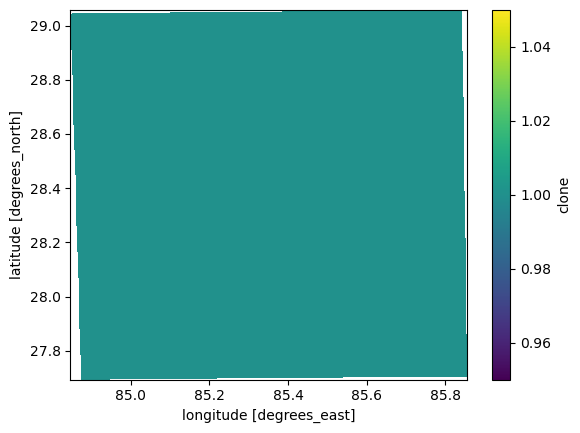

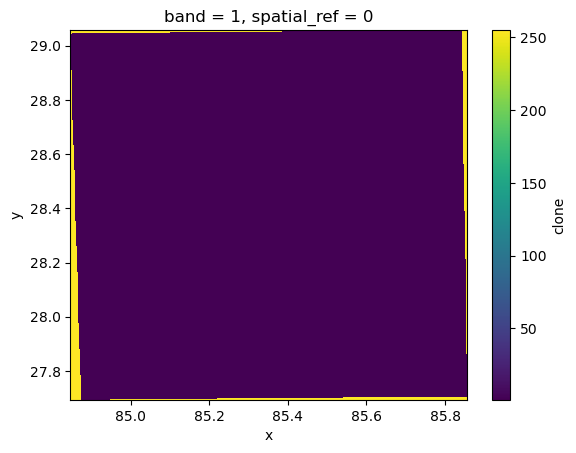

In [18]:
varname = 'clone'

map_clone.write_pcraster(path = os.path.join(path_out, 'clone.map'))
map_clone.write_netcdf(path = os.path.join(path_out, 'clone.nc'), varname = varname, epsg = epsg_check)
map_clone.write_raster(path = os.path.join(path_out, 'clone.tif'), varname = varname, epsg = epsg_check)

pcr.aguila(os.path.join(path_out, 'clone.map'))
with xr.open_dataset(os.path.join(path_out, 'clone.nc')) as da:
    da[varname].plot()
    plt.show()
with rioxarray.open_rasterio(os.path.join(path_out, 'clone.tif')) as da_rio:
    da_rio.sel(band = 1).plot()
    plt.show()

write_pcraster: written to output/dem.map.
write_netcdf: written to output/dem.nc.
write_raster: written to output/dem.tif.


/Users/sony061/miniconda3/envs/sphy/lib/python3.9/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


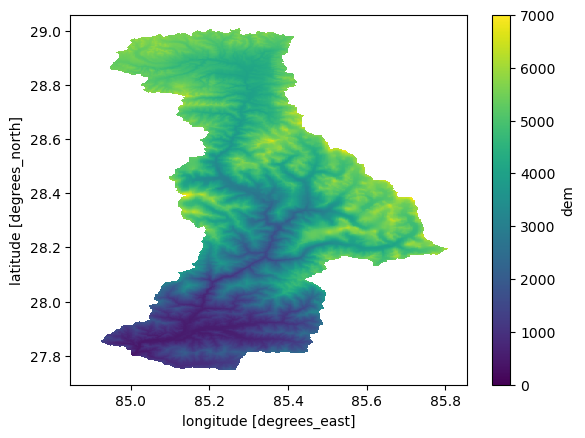

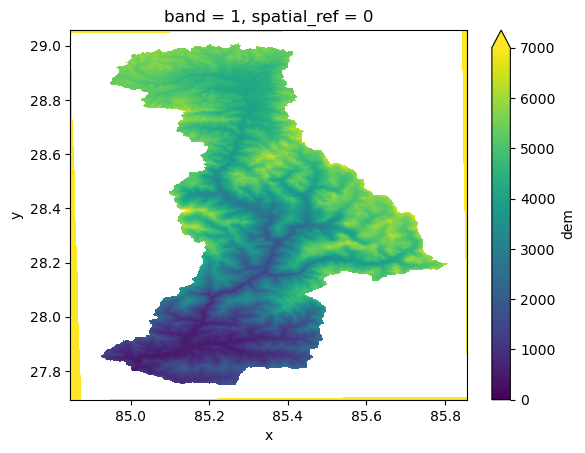

In [19]:
varname = 'dem'

map_clone.write_pcraster(path = os.path.join(path_out, 'dem.map'), field = path_dem)
map_clone.write_netcdf(path = os.path.join(path_out, 'dem.nc'), field = path_dem, varname = varname, epsg = epsg_check)
map_clone.write_raster(path = os.path.join(path_out, 'dem.tif'), field = path_dem, varname = varname, epsg = epsg_check)

pcr.aguila(os.path.join(path_out, 'dem.map'))
with xr.open_dataset(os.path.join(path_out, 'dem.nc')) as da:
    da[varname].plot(vmin = 0, vmax = 7000)
    plt.show()
with rioxarray.open_rasterio(os.path.join(path_out, 'dem.tif')) as da_rio:
    da_rio.sel(band = 1).plot(vmin = 0, vmax = 7000)
    plt.show()

write_pcraster: written to output/tavg0000.001 - #1/9.
write_pcraster: written to output/tavg0000.002 - #2/9.
write_pcraster: written to output/tavg0000.003 - #3/9.
write_pcraster: written to output/tavg0000.004 - #4/9.
write_pcraster: written to output/tavg0000.005 - #5/9.
write_pcraster: written to output/tavg0000.006 - #6/9.
write_pcraster: written to output/tavg0000.007 - #7/9.
write_pcraster: written to output/tavg0000.008 - #8/9.
write_pcraster: written to output/tavg0000.009 - #9/9.
write_netcdf: written to output/tavg.nc.
write_raster: written to output/tavg0000.001.tif - #1/9.
write_raster: written to output/tavg0000.002.tif - #2/9.
write_raster: written to output/tavg0000.003.tif - #3/9.
write_raster: written to output/tavg0000.004.tif - #4/9.


/Users/sony061/miniconda3/envs/sphy/lib/python3.9/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


write_raster: written to output/tavg0000.005.tif - #5/9.
write_raster: written to output/tavg0000.006.tif - #6/9.
write_raster: written to output/tavg0000.007.tif - #7/9.
write_raster: written to output/tavg0000.008.tif - #8/9.
write_raster: written to output/tavg0000.009.tif - #9/9.


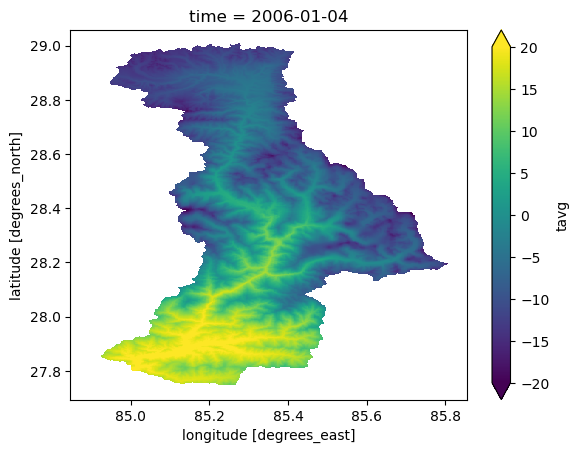

/Users/sony061/miniconda3/envs/sphy/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


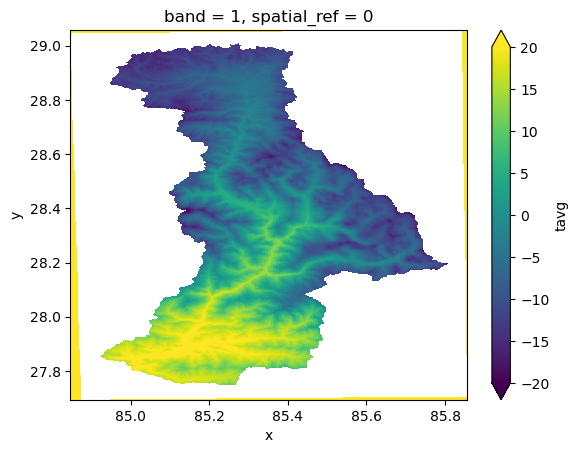

In [20]:
varname = 'tavg'

map_clone.write_pcraster(path = [os.path.join(path_out, os.path.basename(p)) for p in path_tavg], field = path_tavg)
map_clone.write_netcdf(path = os.path.join(path_out, 'tavg.nc'), field = path_tavg, tcoord = tcoord, varname = varname, epsg = epsg_check)
map_clone.write_raster(path = [os.path.join(path_out, os.path.basename(p) + '.tif') for p in path_tavg], field = path_tavg, tcoord = tcoord, varname = varname, epsg = epsg_check)

idx_plot = 3
pcr.aguila([os.path.join(path_out, os.path.basename(p)) for p in path_tavg][idx_plot])
with xr.open_dataset(os.path.join(path_out, 'tavg.nc')) as da:
    da[varname].isel(time = idx_plot).plot(vmin = -20, vmax = 20)
    plt.show()
with rioxarray.open_rasterio([os.path.join(path_out, os.path.basename(p) + '.tif') for p in path_tavg][idx_plot]) as da_rio:
    da_rio.sel(band = 1).plot(vmin = -20, vmax = 20)
    plt.show()

There are also functions to read from NETCDF/RASTER.

In [21]:
map_clone_readnc = map_clone.read_netcdf(path = os.path.join(path_out, 'clone.nc'), varname = 'clone', epsg = epsg_check, datatype = pcr.Boolean, xdim = 'x', ydim = 'y')
map_clone_readrst = map_clone.read_raster(path = os.path.join(path_out, 'clone.tif'), epsg = epsg_check, datatype = pcr.Boolean, band = 1)
pcr.aguila(map_clone_readnc)
pcr.aguila(map_clone_readrst)

In [22]:
map_dem_readnc = map_clone.read_netcdf(path = os.path.join(path_out, 'dem.nc'), varname = 'dem', epsg = epsg_check, datatype = pcr.Scalar, xdim = 'x', ydim = 'y')
map_dem_readrst = map_clone.read_raster(path = os.path.join(path_out, 'dem.tif'), epsg = epsg_check, datatype = pcr.Scalar, band = 1)
pcr.aguila(map_dem_readnc)
pcr.aguila(map_dem_readrst)

In [23]:
path_tif = glob.glob(os.path.join(path_out, 'tavg0000.00*.tif')); path_tif.sort()
map_tavg_readnc = map_clone.read_netcdf(path = os.path.join(path_out, 'tavg.nc'), varname = 'tavg', epsg = epsg_check, datatype = pcr.Scalar, xdim = 'x', ydim = 'y', tdim = 'time', tcoord = tcoord)
map_tavg_readrst = map_clone.read_raster(path = path_tif, epsg = epsg_check, datatype = pcr.Scalar, band = 1)

idx_plot = 3
pcr.aguila(map_tavg_readnc[idx_plot])
pcr.aguila(map_tavg_readrst[idx_plot])

We can extend these operations to generate forcing files from other datasets. Here, as an example, the ERA5-LAND dataset is used to generate forcing files.

In [24]:
n_day = 5
map_t2m_ERA5LAND = map_clone.read_netcdf(path = 'ERA5-Land_subset_200301.nc', varname = 't2m', epsg = epsg_check, datatype = pcr.Scalar, xdim = 'longitude', ydim = 'latitude', tdim = 'time', tcoord = pd.date_range(start = pd.Timestamp('01/01/2003'), periods = n_day, freq = 'D'))
map_clone.write_pcraster(path = [os.path.join(path_out, 't2m000.{:03d}'.format(n)) for n in range(n_day)], field = map_t2m_ERA5LAND)

idx_plot = 3
pcr.aguila(map_t2m_ERA5LAND[idx_plot])

write_pcraster: written to output/t2m000.000 - #1/5.
write_pcraster: written to output/t2m000.001 - #2/5.
write_pcraster: written to output/t2m000.002 - #3/5.
write_pcraster: written to output/t2m000.003 - #4/5.
write_pcraster: written to output/t2m000.004 - #5/5.


# 06. Other Plotting Options

In addtion to pcraster.aguila, pcraster.plot can be used to plot through the matplotlib package.

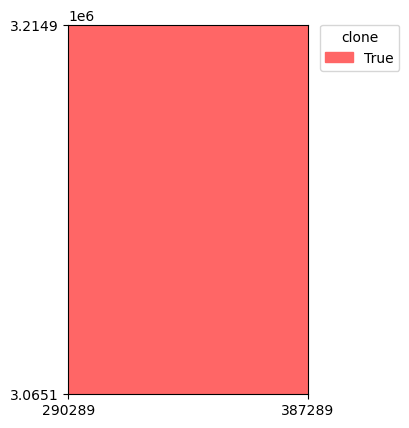

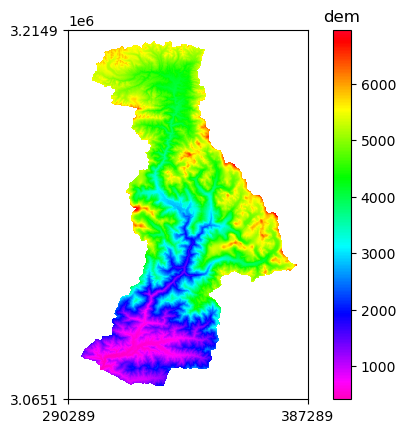

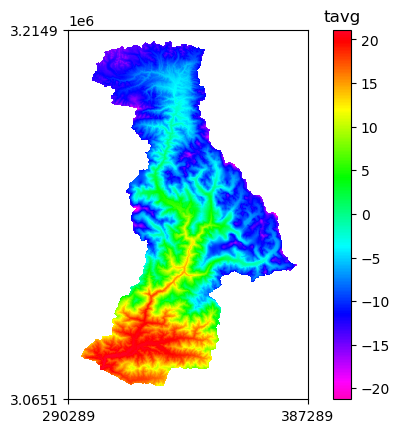

In [25]:
idx_plot = 3
pcr.plot(raster = pcr.readmap(path_clone), labels = {1: 'True'}, title = 'clone') #, filename = os.path.join(path_out, 'clone.png'))
pcr.plot(raster = pcr.readmap(path_dem), title = 'dem')
pcr.plot(raster = pcr.readmap(path_tavg[idx_plot]), title = 'tavg')

pcr_tool has a plot function based on the matplotlib and cartopy packages.

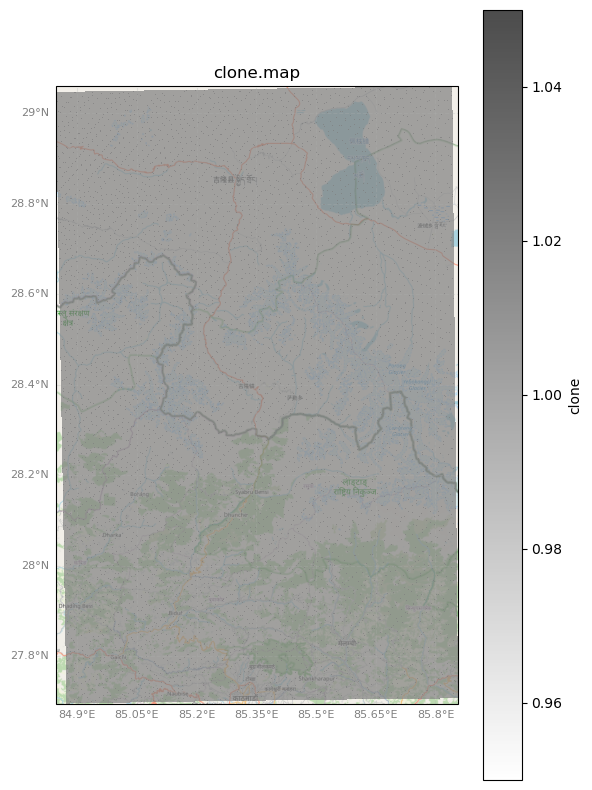

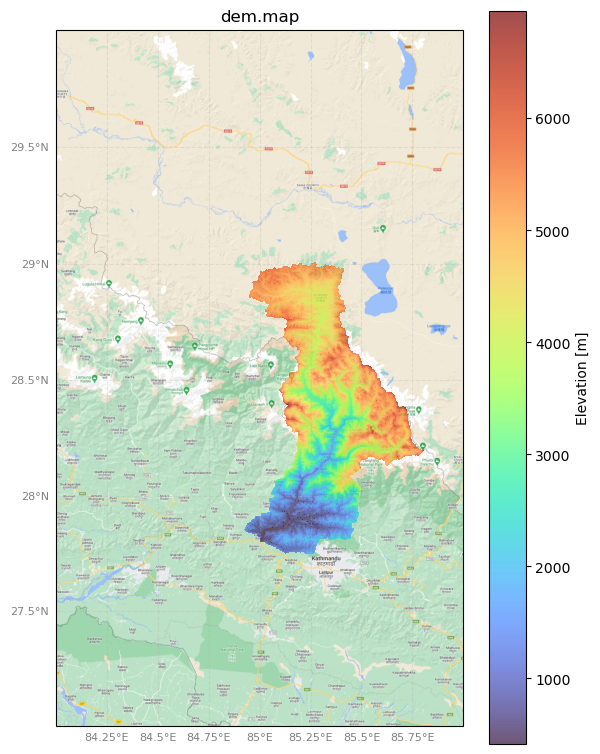

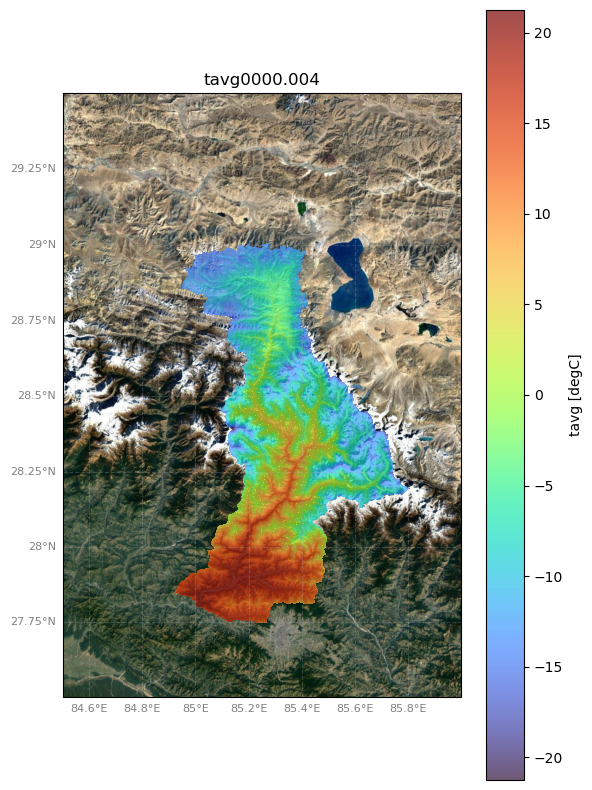

In [26]:
idx_plot = 3
map_clone.plot_cartopy(field = path_clone, figsize = (6, 8), basemap = cartopy.io.img_tiles.OSM(), basemap_level = 10, extent = None, vmin = None, vmax = None, cmap = 'binary', alpha = 0.7, title = 'clone.map', clabel = 'clone', savefig = None)
map_clone.plot_cartopy(field = pcr.readmap(path_dem), figsize = (6, 8), basemap = cartopy.io.img_tiles.GoogleTiles(style = 'street'), basemap_level = 10, extent = [84, 86, 27, 30], vmin = None, vmax = None, cmap = 'turbo', alpha = 0.7, title = 'dem.map', clabel = 'Elevation [m]', savefig = None)
map_clone.plot_cartopy(field = path_tavg, idx_plot = idx_plot, figsize = (6, 8), basemap = cartopy.io.img_tiles.GoogleTiles(style = 'satellite'), basemap_level = 10, extent = [84.5, 86, 27.5, 29.5], vmin = None, vmax = None, cmap = 'turbo', alpha = 0.7, title = os.path.basename(path_tavg[idx_plot]), clabel = 'tavg [degC]', savefig = None)